In [4]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=862e4f358c349279d994780bf8af9d7ee904a0aa212329351b3603f7ca79640a
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [5]:
# Install libraries

#!pip install --upgrade gensim

# !pip install --no-cache-dir transformers sentencepiece

!pip install datasets

!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.8 MB/s eta 0:00:00


In [6]:
import pandas as pd

In [7]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296186 sha256=cf168bf6c8727fab5360de805e65038ded718e58cbb55de6d839d419db835712
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [8]:
!pip install tensorflow

In [9]:
!pip install wordcloud

In [10]:
# !pip install glove-python

In [ ]:
import nltk

from collections import Counter  # word frquency analysis

import heapq

from rouge_score import rouge_scorer

import pandas as pd

import numpy as np

from wordcloud import WordCloud

import matplotlib.pyplot as plt

import re #pattern matching string manipulation 

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

import seaborn as sns

import logging #track execution process

from gensim.models import word2vec, Word2Vec



from numpy import array, asarray, zeros

import evaluate

In [12]:
# !pip install glove-python

# from glove import Corpus, Glove

In [ ]:
# Download nltk packages

nltk.download('punkt') # sentence tokenisation

nltk.download('stopwords')

nltk.download('wordnet') #large database synonmys (used for lementization)

nltk.download('omw-1.4') # multilingual wordnet 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [1]:
# Mount data

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# Root directory variable, helps in decapsulating and avoiding hardcoding csv file names

root = "/content/drive/MyDrive/cnn-data/"

train_df = pd.read_csv(root+"train.csv")
validation_df = pd.read_csv(root+"validation.csv")
test_df = pd.read_csv(root+"test.csv")


# train_df =pd.read_csv('/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/train.csv')

# validation_df = pd.read_csv('/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/validation.csv')

# test_df = pd.read_csv('/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/test.csv')

# Data Understanding and EDA



The data is divided into training, validation and test sets.

* Training set: 287K articles

* Validation set: 13K articles

* Test set: 11K articles



Fields:

* ID : Unique ID of article

* Article: News article body

* Highlights: News article summary



This section will show sample articles and few data points to understand the data more.

In [ ]:
print("Training set shape:", train_df.shape)

print("Validation set shape:", validation_df.shape)

print("Test set shape:", test_df.shape)

Training set shape: (287113, 3)
Validation set shape: (13368, 3)
Test set shape: (11490, 3)


In [19]:
print("Initial training dataset info:")
train_df.info()

Initial training dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          287113 non-null  object
 1   article     287113 non-null  object
 2   highlights  287113 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB


In [20]:
# Inspect for missing values
print("Missing values in train set:\n", train_df.isnull().sum())
print("Missing values in validation set:\n", validation_df.isnull().sum())

Missing values in train set:
 id            0
article       0
highlights    0
dtype: int64
Missing values in validation set:
 id            0
article       0
highlights    0
dtype: int64


In [ ]:
# Snapshot of dataset

train_df.head()

,id,article,highlights
0,40515411fd3a2a9bd3431000485ed910b86b2aa0,"LONDON, England (CNN) -- This week the who's w...","Dubai's ruler met Chinese president, Hu Jintao..."
1,c208e21ba2d886f26bb295cf51f995b267475919,"London, England (CNN) -- ""I had to be stitched...",Singer and actress Olivia Newton-John speaks t...
2,a818c2abb02b6e7de7501746c2c351438284d46c,Virgin America ranked No. 1 in an annual airli...,Virgin America tops Airline Quality Rating for...
3,c41871df8996c5d28c6fd068c230ea56bfdfcbf4,"By . Simon Tomlinson . PUBLISHED: . 04:38 EST,...",Banks agree fines with EU Commission over clai...
4,f9f47733c6a61003c4f2258f990a19bfa4fd40a1,Dominique Ansel's now world-famous pastry - th...,Created by two sisters at Cutter & Squidge bak...


In [ ]:
#Sample article

train_df.iloc[0]['article']

'LONDON, England (CNN) -- This week the who\'s who of the United Arab Emirates rubbed shoulders at a Gala dinner. Business people talked deals, swapped business cards and rubbed shoulders with government elite -- in China. Sheikh Mohammad bin Rashed al Maktoum with Chinese Premier Wen Jiabao . The Chinese government invited Sheikh Mohammed Bin Rashid Al Maktoum on an official visit to the country. The ruler responded by arriving with an entourage of 50 business leaders and throngs of government support -- an obvious symbol of the importance the U.A.E. has put on growing relations with China. "China is a booming market. We\'re here exploring opportunities with Chinese government entities as well as Chinese private sector companies," said Sultan Al Jabar CEO of sustainable energy company, Masdar. The U.S. and Europe arguably identified the exploding opportunities in China 15 years ago and, in fact, make up the bulk of the investment into the country. Compared with the huge amounts of dol

In [ ]:
# Sample summary

train_df.iloc[0]['highlights']

"Dubai's ruler met Chinese president, Hu Jintao this week during an official visit .\nThe two countries -- both booming -- hope to strengthen business ties .\nU.A.E. telecommunications firm Etisalat signed a deal with Huawei Technologies .\nThe Chinese conducted seminars on doing business in China for executives ."

In [ ]:
print("Null values in 'article' column:", train_df['article'].isnull().sum())

print("Null values in 'highlights' column:", train_df['highlights'].isnull().sum())

print("Data types:")

print(train_df.dtypes)

Null values in 'article' column: 0
Null values in 'highlights' column: 0
Data types:
id            object
article       object
highlights    object
dtype: object


In [21]:
# First, let's calculate article and highlight lengths
train_df["article_len"] = train_df["article"].apply(lambda x: len(x.split()))
train_df["highlights_len"] = train_df["highlights"].apply(lambda x: len(x.split()))
print(train_df["article_len"])
print(train_df["highlights_len"])

0          198
1          392
2          808
3          531
4          580
          ... 
287108     537
287109    1056
287110     856
287111     780
287112     974
Name: article_len, Length: 287113, dtype: int64
0          37
1          38
2          69
3          53
4          67
         ... 
287108     42
287109    108
287110     56
287111     55
287112     59
Name: highlights_len, Length: 287113, dtype: int64


In [22]:
# Calculate IQR
Q1 = train_df[['article_len', 'highlights_len']].quantile(0.25)
Q3 = train_df[['article_len', 'highlights_len']].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5 * IQR
outliers = ((train_df[['article_len', 'highlights_len']] < (Q1 - 1.5 * IQR)) |
            (train_df[['article_len', 'highlights_len']] > (Q3 + 1.5 * IQR)))

# Show rows that are outliers
outlier_rows = train_df[outliers.any(axis=1)]
print("Outliers:")
print(outlier_rows)

Outliers:
                                              id  \
10      0009ebb1967511741629926ef9f5faea2bb6be24   
27      001b4673dbb3437282cd2ea58d9eca471e25780f   
33      001ee59c375363263821474d40e4386ab91d5145   
77      003d23a256ce34d73e05968a04727c0ed4a2a456   
83      0043419182bdb005875dd3da575ebe38570907e8   
...                                          ...   
287061  ffee72fd91f2e9eac5f8fb6d85fe67b131c3c24f   
287064  ffef234bc77d6fc58f56b03c2b0c7cd24239a0e3   
287093  fffa5b51768e8689c470e64bb4bfb039ccc1eaf9   
287102  fffc82af3daa218f2e08e69ec325c2e1847a5490   
287109  fffeecb8690b85de8c3faed80adbc7a978f9ae2a   

                                                  article  \
10      By . Ellie Zolfagharifard . Take a look at a m...   
27      By . Rob Cooper . PUBLISHED: . 03:53 EST, 23 J...   
33      These days we pick up a packet of frozen prawn...   
77      By . David Williams . They were intended to be...   
83      The Sunni extremists running roughshod across ...   

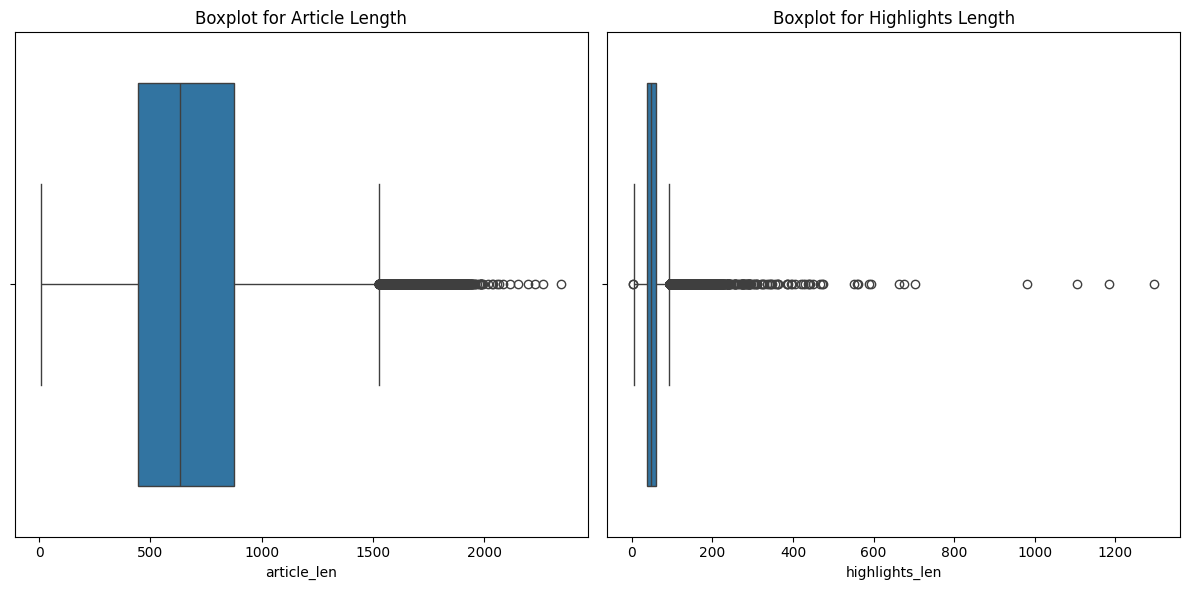

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to visualize outliers in article and highlight lengths
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=train_df['article_len'])
plt.title('Boxplot for Article Length')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['highlights_len'])
plt.title('Boxplot for Highlights Length')

plt.tight_layout()
plt.show()

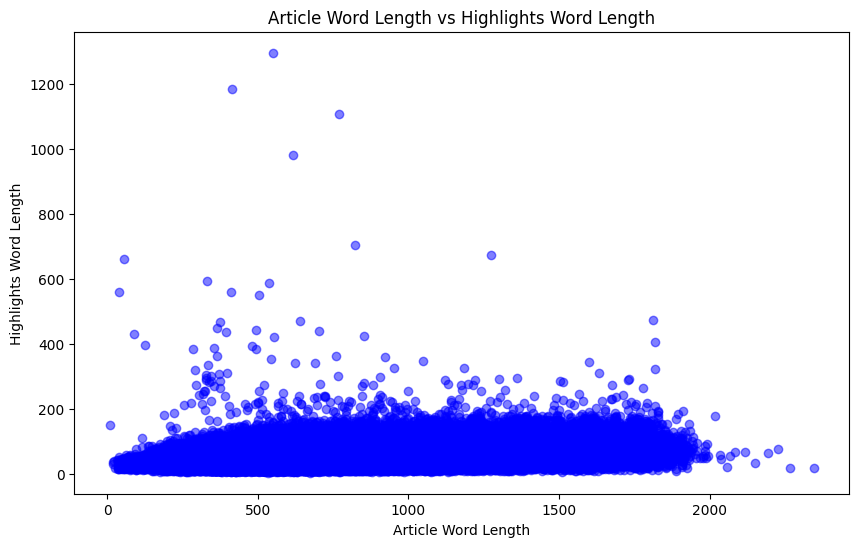

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Article length vs Highlights length
plt.figure(figsize=(10, 6))
plt.scatter(train_df['article_len'], train_df['highlights_len'], alpha=0.5, color='b')
plt.title('Article Word Length vs Highlights Word Length')
plt.xlabel('Article Word Length')
plt.ylabel('Highlights Word Length')
plt.show()

In [25]:
# Calculate the percentage threshold
threshold_percentage = 0.60

# Filter rows where highlights length is greater than 60% of article length
highlight_greater_than_60_percent = train_df[train_df['highlights_len'] > (threshold_percentage * train_df['article_len'])]

print(f"Original number of rows: {train_df.shape[0]}")
# Drop the rows from the original DataFrame
train_df = train_df.drop(highlight_greater_than_60_percent.index)

print(f"Number of rows after removal: {train_df.shape[0]}")

Original number of rows: 287113
Number of rows after removal: 286950


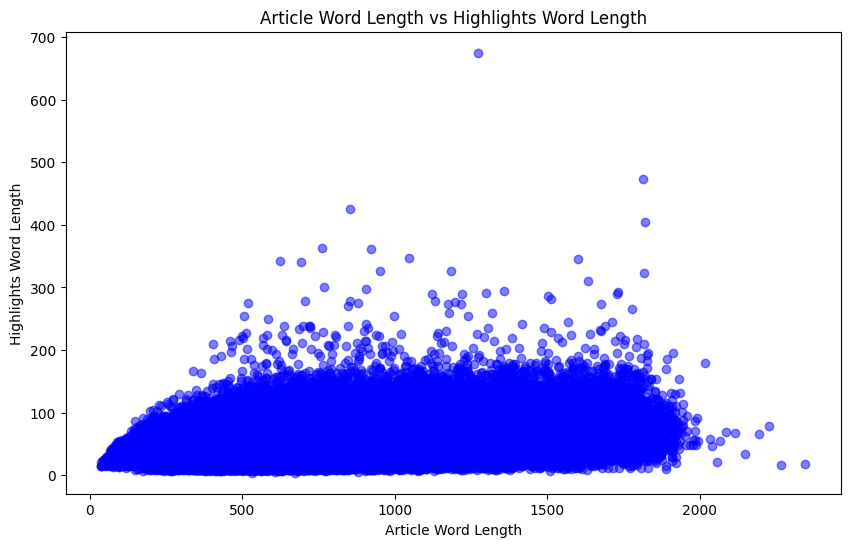

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Article length vs Highlights length
plt.figure(figsize=(10, 6))
plt.scatter(train_df['article_len'], train_df['highlights_len'], alpha=0.5, color='b')
plt.title('Article Word Length vs Highlights Word Length')
plt.xlabel('Article Word Length')
plt.ylabel('Highlights Word Length')
plt.show()

In [27]:
# Sample data for computational purposes

train_df = train_df.sample(30000).reset_index(drop=True)

In [ ]:
sample_size = min(30000, len(train_df))  # Ensure sample size doesn't exceed available rows

all_highlights_sample = ' '.join(train_df['highlights'].sample(sample_size, replace=False))

print(len(all_highlights_sample))

8860292


In [ ]:
class Preprocess():

  def __init__(self):

    pass

  def toLower(self, x):

    '''Converts string to lowercase'''

    return x.lower()



  def sentenceTokenize(self, x):

    '''Tokenizes document into sentences'''

    sent_tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")

    sentences = sent_tokenizer.tokenize(x)

    return sentences



  def preprocess_sentences(self, all_sentences):

    '''Tokenizes sentences into words, removes punctuations, stopwords and

    performs tokenization'''

    word_tokenizer = nltk.RegexpTokenizer(r"\w+")

    sentences = []

    special_characters = re.compile("[^A-Za-z0-9 ]")

    for s in all_sentences:

      # remove punctuation

      s = re.sub(special_characters, " ", s)

      # Word tokenize

      words = word_tokenizer.tokenize(s)

      # Remove Stopwords

      words = self.removeStopwords(words)

      # Perform lemmatization

      words = self.wordnet_lemmatize(words)

      sentences.append(words)

    return sentences



  def removeStopwords(self, sentence):

    '''Removes stopwords from a sentence'''

    stop_words = stopwords.words('english')

    tokens = [token for token in sentence if token not in stop_words]

    return tokens



  def wordnet_lemmatize(self, sentence):

    '''Lemmatizes tokens in a sentence'''

    lemmatizer = WordNetLemmatizer()

    tokens = [lemmatizer.lemmatize(token, pos='v') for token in sentence]

    return tokens



  def complete_preprocess(self, text):

    '''Performs complete preprocessing on document'''

    #Convert text to lowercase

    text_lower = self.toLower(text)

    #Sentence tokenize the document

    sentences = self.sentenceTokenize(text_lower)

    #Preprocess all sentences

    preprocessed_sentences = self.preprocess_sentences(sentences)

    return preprocessed_sentences



  def generate_wordcloud(self, text):

    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

    plt.figure(figsize=(15,8))

    plt.imshow(word_cloud, interpolation='bilinear')

    plt.axis("off")

    plt.show()



  def calculate_length(self, df):

    df["article_len"] = df["article"].apply(lambda x: len(x.split()))

    df["highlights_len"] = df["highlights"].apply(lambda x: len(x.split()))

    return df





In [ ]:
# Instantiate custom preprocessor

preprocessor = Preprocess()

In [ ]:
import os
import nltk

# Set the directory for NLTK data
nltk_data_dir = '/kaggle/working/nltk_data'
os.makedirs(nltk_data_dir, exist_ok=True)

# Set the NLTK_DATA environment variable to point to the new directory
os.environ['NLTK_DATA'] = nltk_data_dir

# Download the required NLTK packages
nltk.download('wordnet', download_dir=nltk_data_dir)
nltk.download('omw-1.4', download_dir=nltk_data_dir)  # Optional for better word matching
nltk.download('punkt', download_dir=nltk_data_dir)

# Check if the downloads are successful by verifying the corpus location
print("NLTK data directory set to:", nltk_data_dir)

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /kaggle/working/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
NLTK data directory set to: /kaggle/working/nltk_data


In [ ]:
import zipfile

# Path to the WordNet zip file
wordnet_zip_path = '/kaggle/working/nltk_data/corpora/wordnet.zip'
wordnet_extract_path = '/kaggle/working/nltk_data/corpora/'

# Extract if it exists
if os.path.exists(wordnet_zip_path):
    with zipfile.ZipFile(wordnet_zip_path, 'r') as zip_ref:
        zip_ref.extractall(wordnet_extract_path)
    print("Extracted WordNet corpus.")
else:
    print("WordNet zip file not found.")

Extracted WordNet corpus.


In [ ]:
import os

# Path to check if the WordNet corpus exists
wordnet_path = '/kaggle/working/nltk_data/corpora/wordnet'
if os.path.exists(wordnet_path):
    print("WordNet corpus found in:", wordnet_path)
else:
    print("WordNet corpus not found. Please check the directory structure.")

WordNet corpus found in: /kaggle/working/nltk_data/corpora/wordnet


In [ ]:
# Verify the WordNet corpus
try:
    # Test loading wordnet explicitly
    wordnet.ensure_loaded()
    print("WordNet loaded successfully.")
except LookupError as e:
    print("Failed to load WordNet:", e)

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /kaggle/working/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
WordNet loaded successfully.


In [ ]:
test_df["clean_article"] = test_df['article'].apply(lambda x: preprocessor.complete_preprocess(x))

test_df["clean_highlights"] = test_df['highlights'].apply(lambda x: preprocessor.complete_preprocess(x))

test_df.head()

,id,article,highlights,clean_article,clean_highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...,"[[ever, notice, plane, seat, appear, get, smal...","[[experts, question, pack, plan, put, passenge..."
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...,"[[drink, teenage, boy, rescue, security, jump,...","[[drink, teenage, boy, climb, lion, enclosure,..."
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...,"[[dougie, freedman, verge, agree, new, two, ye...","[[nottingham, forest, close, extend, dougie, f..."
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...,"[[liverpool, target, neto, also, want, psg, cl...","[[fiorentina, goalkeeper, neto, link, liverpoo..."
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6...","[[bruce, jenner, break, silence, two, hour, in...","[[tell, interview, reality, tv, star, 69, air,..."


In [ ]:
validation_df["clean_article"] = validation_df['article'].apply(lambda x: preprocessor.complete_preprocess(x))

validation_df["clean_highlights"] = validation_df['highlights'].apply(lambda x: preprocessor.complete_preprocess(x))

validation_df.head()

,id,article,highlights,clean_article,clean_highlights
0,61df4979ac5fcc2b71be46ed6fe5a46ce7f071c3,"Sally Forrest, an actress-dancer who graced th...","Sally Forrest, an actress-dancer who graced th...","[[sally, forrest, actress, dancer, grace, silv...","[[sally, forrest, actress, dancer, grace, silv..."
1,21c0bd69b7e7df285c3d1b1cf56d4da925980a68,A middle-school teacher in China has inked hun...,Works include pictures of Presidential Palace ...,"[[middle, school, teacher, china, ink, hundred...","[[work, include, picture, presidential, palace..."
2,56f340189cd128194b2e7cb8c26bb900e3a848b4,A man convicted of killing the father and sist...,"Iftekhar Murtaza, 29, was convicted a year ago...","[[man, convict, kill, father, sister, former, ...","[[iftekhar, murtaza, 29, convict, year, ago, k..."
3,00a665151b89a53e5a08a389df8334f4106494c2,Avid rugby fan Prince Harry could barely watch...,Prince Harry in attendance for England's crunc...,"[[avid, rugby, fan, prince, harry, could, bare...","[[prince, harry, attendance, england, crunch, ..."
4,9f6fbd3c497c4d28879bebebea220884f03eb41a,A Triple M Radio producer has been inundated w...,Nick Slater's colleagues uploaded a picture to...,"[[triple, radio, producer, inundate, message, ...","[[nick, slater, colleagues, upload, picture, f..."


In [ ]:
train_df["clean_article"] = train_df['article'].apply(lambda x: preprocessor.complete_preprocess(x))

train_df["clean_highlights"] = train_df['highlights'].apply(lambda x: preprocessor.complete_preprocess(x))

train_df.head()

,id,article,highlights,clean_article,clean_highlights
0,40515411fd3a2a9bd3431000485ed910b86b2aa0,"LONDON, England (CNN) -- This week the who's w...","Dubai's ruler met Chinese president, Hu Jintao...","[[london, england, cnn, week, unite, arab, emi...","[[dubai, ruler, meet, chinese, president, hu, ..."
1,c208e21ba2d886f26bb295cf51f995b267475919,"London, England (CNN) -- ""I had to be stitched...",Singer and actress Olivia Newton-John speaks t...,"[[london, england, cnn, stitch, pant, olivia, ...","[[singer, actress, olivia, newton, john, speak..."
2,a818c2abb02b6e7de7501746c2c351438284d46c,Virgin America ranked No. 1 in an annual airli...,Virgin America tops Airline Quality Rating for...,"[[virgin, america, rank], [1, annual, airline,...","[[virgin, america, top, airline, quality, rat,..."
3,c41871df8996c5d28c6fd068c230ea56bfdfcbf4,"By . Simon Tomlinson . PUBLISHED: . 04:38 EST,...",Banks agree fines with EU Commission over clai...,"[[], [simon, tomlinson], [publish], [04, 38, e...","[[bank, agree, fin, eu, commission, claim, for..."
4,f9f47733c6a61003c4f2258f990a19bfa4fd40a1,Dominique Ansel's now world-famous pastry - th...,Created by two sisters at Cutter & Squidge bak...,"[[dominique, ansel, world, famous, pastry, cro...","[[create, two, sisters, cutter, squidge, baker..."


In [ ]:
sample_size = min(30000, len(train_df))  # Ensure sample size doesn't exceed available rows
all_news_sample = ' '.join(train_df['articles'].sample(sample_size, replace=False))
print(len(all_news_sample))

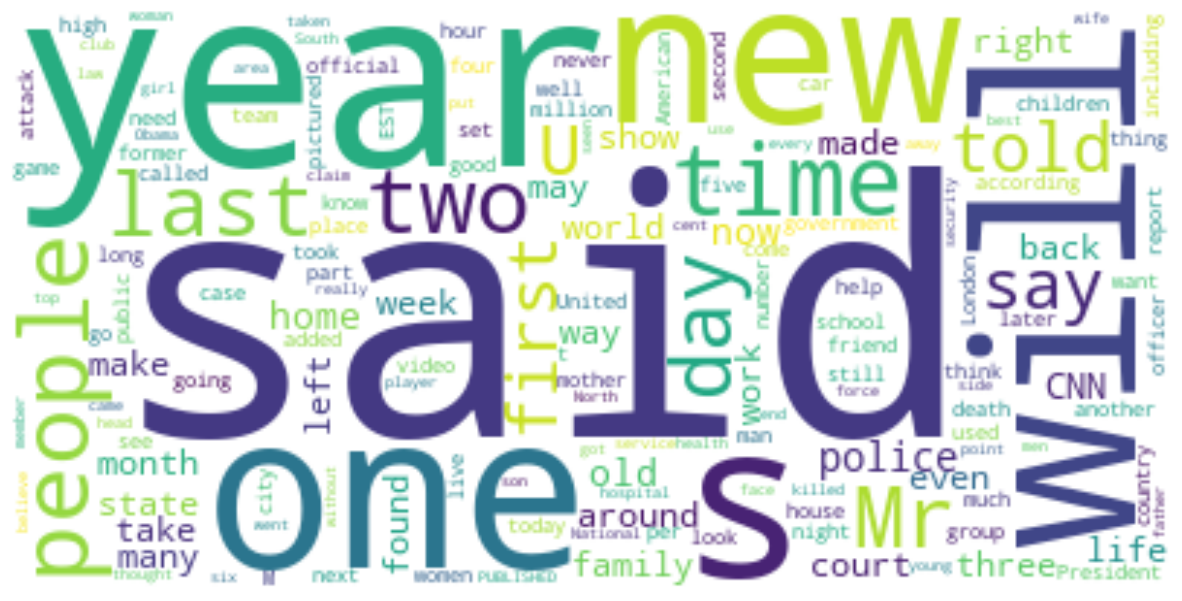

In [ ]:
preprocessor.generate_wordcloud(all_news_sample)

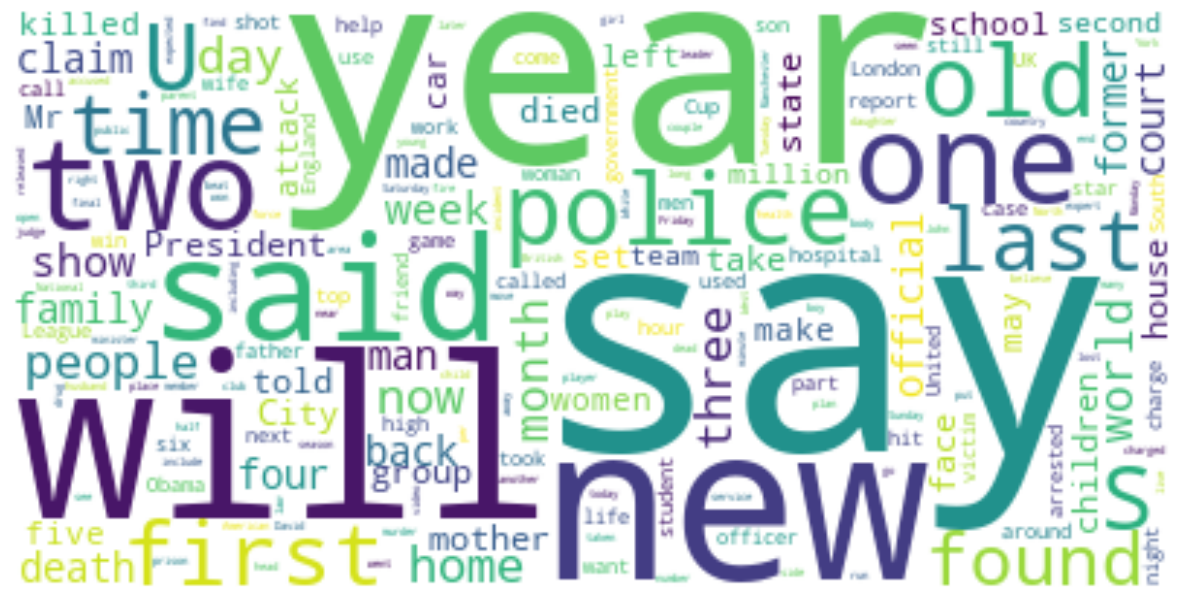

In [ ]:
preprocessor.generate_wordcloud(all_highlights_sample)

Let's look at the length of news articles and summaries.

In [ ]:
# Calculate length

train_df = preprocessor.calculate_length(train_df)

validation_df = preprocessor.calculate_length(validation_df)

test_df = preprocessor.calculate_length(test_df)


In [ ]:
# Concatenate all sets for EDA

total_df = pd.concat([train_df, validation_df, test_df])

total_df.head()

,id,article,highlights,clean_article,clean_highlights,article_len,highlights_len
0,40515411fd3a2a9bd3431000485ed910b86b2aa0,"LONDON, England (CNN) -- This week the who's w...","Dubai's ruler met Chinese president, Hu Jintao...","[[london, england, cnn, week, unite, arab, emi...","[[dubai, ruler, meet, chinese, president, hu, ...",722,50
1,c208e21ba2d886f26bb295cf51f995b267475919,"London, England (CNN) -- ""I had to be stitched...",Singer and actress Olivia Newton-John speaks t...,"[[london, england, cnn, stitch, pant, olivia, ...","[[singer, actress, olivia, newton, john, speak...",490,34
2,a818c2abb02b6e7de7501746c2c351438284d46c,Virgin America ranked No. 1 in an annual airli...,Virgin America tops Airline Quality Rating for...,"[[virgin, america, rank], [1, annual, airline,...","[[virgin, america, top, airline, quality, rat,...",538,37
3,c41871df8996c5d28c6fd068c230ea56bfdfcbf4,"By . Simon Tomlinson . PUBLISHED: . 04:38 EST,...",Banks agree fines with EU Commission over clai...,"[[], [simon, tomlinson], [publish], [04, 38, e...","[[bank, agree, fin, eu, commission, claim, for...",603,66
4,f9f47733c6a61003c4f2258f990a19bfa4fd40a1,Dominique Ansel's now world-famous pastry - th...,Created by two sisters at Cutter & Squidge bak...,"[[dominique, ansel, world, famous, pastry, cro...","[[create, two, sisters, cutter, squidge, baker...",756,37


We can see, the mean length of articles is around 690 words and of the summaries is around 52 words.

The max length of an article is 2347 words and of summaries is 1440 words

In [ ]:
total_df[['article_len','highlights_len']].describe()

,article_len,highlights_len
count,54858.000000,54858.000000
mean,686.210544,53.813336
std,339.745388,22.452224
min,32.000000,6.000000
25%,432.000000,39.000000
50%,623.000000,50.000000
75%,875.000000,63.000000
max,2195.000000,1440.000000


## Distribution of Article and Summary Length



The distribution of both news articles and summaries is right skewed. Mode of article length is around 500 and of summary length is around 50.

/tmp/ipykernel_30/1310869637.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_df['article_len'], ax=axes[0])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_30/1310869637.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for 

<Axes: xlabel='highlights_len', ylabel='Density'>

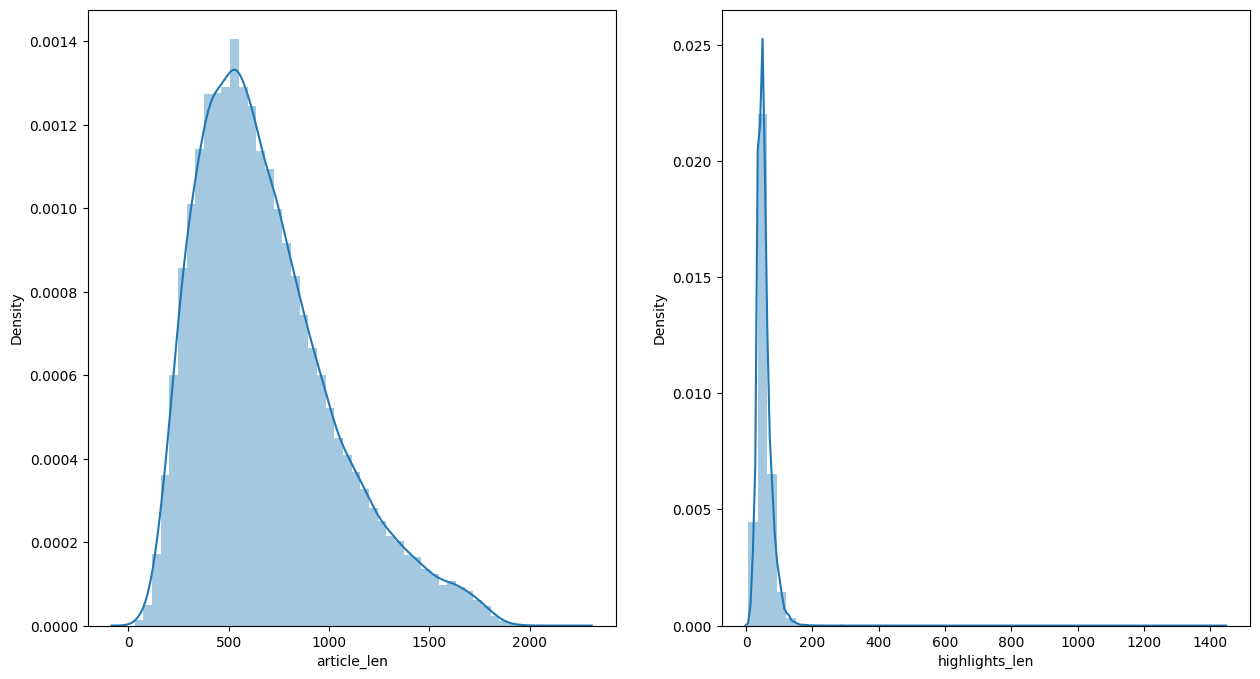

In [ ]:
# Create subplots and plot a distribution plot

fig, axes = plt.subplots(1, 2, figsize = (15,8))

sns.distplot(total_df['article_len'], ax=axes[0])

sns.distplot(total_df['highlights_len'], ax = axes[1])

Summary lengths and article lengths both have a few outliers, indicating few articles have longer length and corresponding longer summaries.

## Extractive Summarization

In [ ]:
class NewsSummarization():

  def __init__(self):

    pass

  def extractive_summary(self, text, sentence_len = 8, num_sentences = 3):

    '''Generates extractive summary of num_sentences length using sentence scoring'''

    word_frequencies = {}

    # Instantiate Custom Preprocessor class

    preprocessor = Preprocess()

    # preprocess and tokenize article

    tokenized_article = preprocessor.complete_preprocess(text)

    #calculate word frequencies

    for sentence in tokenized_article:

      for word in sentence:

        if word not in word_frequencies.keys():

          word_frequencies[word] = 1

        else:

          word_frequencies[word] += 1

    #get maximum frequency for score normalisation

    maximum_frequency = max(word_frequencies.values())

    #normalize word frequency

    for word in word_frequencies.keys():

          word_frequencies[word] = (word_frequencies[word]/maximum_frequency)

    sentence_scores = {}



    # score sentences by adding word scores

    sentence_list = nltk.sent_tokenize(text)

    for sent in sentence_list:

        for word in nltk.word_tokenize(sent.lower()):

            if word in word_frequencies.keys():

                if len(sent.split(' ')) > sentence_len:

                    if sent not in sentence_scores.keys():

                        sentence_scores[sent] = word_frequencies[word]

                    else:

                        sentence_scores[sent] += word_frequencies[word]

    # get sentences with largest sentence scores

    summary_sentences = heapq.nlargest(num_sentences, sentence_scores, key=sentence_scores.get)

    # join and get extractive summary

    summary = ' '.join(summary_sentences)

    return summary



  def get_rouge_score(self, actual_summary, generated_summary):

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    scores = scorer.score(actual_summary, generated_summary)

    return scores



  def evaluate_extractive(self, dataset, metric):

    summaries = [self.extractive_summary(text) for text in dataset["article"]]

    score =  metric.compute(predictions=summaries, references=dataset["highlights"])

    rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

    rouge_dict = dict((rn, round(score[rn].mid.fmeasure * 100, 2)) for rn in rouge_names)

    return rouge_dict

In [ ]:
news_summarizer = NewsSummarization()

In [ ]:
article = test_df['article'][1]

highlight = test_df['highlights'][1]

ex_summary = news_summarizer.extractive_summary(article)

In [ ]:
article

"A drunk teenage boy had to be rescued by security after jumping into a lions' enclosure at a zoo in western India. Rahul Kumar, 17, clambered over the enclosure fence at the\xa0Kamla Nehru Zoological Park in Ahmedabad, and began running towards the animals, shouting he would 'kill them'. Mr Kumar explained afterwards that he was drunk and 'thought I'd stand a good chance' against the predators. Next level drunk: Intoxicated Rahul Kumar, 17, climbed into the lions' enclosure at a zoo in Ahmedabad and began running towards the animals shouting 'Today I kill a lion!' Mr Kumar had been sitting near the enclosure when he suddenly made a dash for the lions, surprising zoo security. The intoxicated teenager ran towards the lions, shouting: 'Today I kill a lion or a lion kills me!' A zoo spokesman said: 'Guards had earlier spotted him close to the enclosure but had no idea he was planing to enter it. 'Fortunately, there are eight moats to cross before getting to where the lions usually are an

In [ ]:
ex_summary

"Brave fool: Fortunately, Mr Kumar  fell into a moat as he ran towards the lions and could be rescued by zoo security staff before reaching the animals (stock image) Kumar later explained: 'I don't really know why I did it. Next level drunk: Intoxicated Rahul Kumar, 17, climbed into the lions' enclosure at a zoo in Ahmedabad and began running towards the animals shouting 'Today I kill a lion!' Mr Kumar had been sitting near the enclosure when he suddenly made a dash for the lions, surprising zoo security."

In [ ]:
news_summarizer.get_rouge_score(highlight, ex_summary)

{'rouge1': Score(precision=0.34444444444444444, recall=0.8611111111111112, fmeasure=0.49206349206349204),
 'rouge2': Score(precision=0.20224719101123595, recall=0.5142857142857142, fmeasure=0.29032258064516125),
 'rougeL': Score(precision=0.2111111111111111, recall=0.5277777777777778, fmeasure=0.30158730158730157)}

In [ ]:
# Uninstall the previous installed nltk library
!pip install -U nltk

# This upgraded nltkto version 3.5 in which meteor_score is there.
!pip install nltk==3.5

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434678 sha256=6dd45140ee30956e26e15ae65e35b8df65924488ed66a883a5c1aeea4e267f2b
  Stored in directory: /root/.cache/pip/wheels/35/ab/82/f9667f6f884d272670a15382599a9c753a1dfdc83f7412e37d
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.

In [ ]:
!pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import meteor_score
from bert_score import score as bert_score

In [ ]:
import evaluate

# Load the required metrics
rouge_metric = evaluate.load("rouge")
meteor_metric = evaluate.load("meteor")
bertscore_metric = evaluate.load("bertscore")

def evaluate_performance(dataset):
    # Convert tokenized sentences back to strings
    references = [' '.join([' '.join(sentence) for sentence in highlight]) for highlight in dataset["clean_highlights"]]
    predictions = [' '.join([' '.join(sentence) for sentence in article]) for article in dataset["clean_article"]]

    # Generate summaries for predictions
    generated_summaries = [news_summarizer.extractive_summary(text) for text in predictions]

    # Compute ROUGE Scores
    rouge_scores = rouge_metric.compute(predictions=generated_summaries, references=references)
    rouge_results = {
        "ROUGE-1": round(rouge_scores["rouge1"] * 100, 2),
        "ROUGE-2": round(rouge_scores["rouge2"] * 100, 2),
        "ROUGE-L": round(rouge_scores["rougeL"] * 100, 2),
        "ROUGE-Lsum": round(rouge_scores["rougeLsum"] * 100, 2)
    }

    # Compute METEOR Score
    meteor_score = meteor_metric.compute(predictions=generated_summaries, references=references)
    meteor_result = round(meteor_score["meteor"] * 100, 2)

    # Compute BERTScore
    bertscore_result = bertscore_metric.compute(predictions=generated_summaries, references=references, lang="en")
    bertscore_f1 = round(np.mean(bertscore_result["f1"]) * 100, 2)

    # Display the results
    evaluation_results = {
        "ROUGE-1": rouge_results["ROUGE-1"],
        "ROUGE-2": rouge_results["ROUGE-2"],
        "ROUGE-L": rouge_results["ROUGE-L"],
        "METEOR": meteor_result,
        "BERTScore (F1)": bertscore_f1
    }

    return evaluation_results

# Example usage
results = evaluate_performance(test_df)
print("Evaluation Results:", results)

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Evaluation Results: {'ROUGE-1': 15.97, 'ROUGE-2': 8.3, 'ROUGE-L': 11.87, 'METEOR': 33.38, 'BERTScore (F1)': 81.09}
